In [10]:
import numpy as np

In [3]:
resultsNF1 = np.load("save_NF1/cartesian_position.npy")
targetsNF1 = np.load("save_NF1/targets.npy")

resultsCF1 = np.load("save_CF1/cartesian_position.npy")
targetsCF1 = np.load("save_CF1/targets.npy")

resultsNF2 = np.load("save_NF2/cartesian_position.npy")
targetsNF2 = np.load("save_NF2/targets.npy")

resultsCF2 = np.load("save_CF2/cartesian_position.npy")
targetsCF2 = np.load("save_CF2/targets.npy")

## Finding the Curve Deviations

In [4]:
import math

def findEquationOfLine(startPoint, endPoint):
    x = (startPoint[0], endPoint[0]) # x value of the starting and ending point of the trajectory
    y = (startPoint[1], endPoint[1]) # y value of the starting and ending point of the trajectory
    slopeInterceptCoefficients = np.polyfit(x, y, 1) #fits a polynomial of degree 1 (linear) to the points
    # returns y = ax + c; therefore, ax -y + c = 0; so b = -1
    a = slopeInterceptCoefficients[0]
    b = -1
    c = slopeInterceptCoefficients[1]
    standardCoefficients = [a, b, c]
    return standardCoefficients

def findDeviationFromStraightLine(targetsArr, resultsArr):
    listDeviations = []
    for i in range(len(resultsArr[:,0,0])):
        # find the target straight line equation
        currStartPoint = targetsArr[i,0,0:2]
        currEndPoint = targetsArr[i,-1,0:2]
        standardCoefficients = findEquationOfLine(currStartPoint, currEndPoint)
        a = standardCoefficients[0]
        b = standardCoefficients[1]
        c = standardCoefficients[2]

        # find the trajectory of the current reach
        currReach = resultsArr[i, :, 0:2]

        # find how far each point in the trajectory 
        currDeviationArr = []
        for j in range(len(currReach[:,0])):
            x1 = currReach[j,0]
            y1 = currReach[j, 1]

            #equation of a line is ax + by + c = 0
            currDist = (abs(a*x1 + b*y1 + c)) / math.sqrt(a*a + b*b)
            currDeviationArr.append(currDist)

        listDeviations.append(currDeviationArr)
    return listDeviations

In [5]:
deviationsNF1 = findDeviationFromStraightLine(targetsNF1, resultsNF1)
deviationsCF1 = findDeviationFromStraightLine(targetsCF1, resultsCF1)
deviationsNF2 = findDeviationFromStraightLine(targetsNF2, resultsNF2)
deviationsCF2 = findDeviationFromStraightLine(targetsCF2, resultsCF2)

In [6]:
# analyze deviation from straight line
import statistics

listMediansNF1 = []
listMeansNF1 = []
listMaxNF1 = []

listMediansCF1 = []
listMeansCF1 = []
listMaxCF1 = []

listMediansNF2 = []
listMeansNF2 = []
listMaxNF2 = []

listMediansCF2 = []
listMeansCF2 = []
listMaxCF2 = []

for i in range(len(deviationsNF1)):
    listMediansNF1.append(statistics.median(deviationsNF1[i]))
    listMeansNF1.append(statistics.mean(deviationsNF1[i]))
    listMaxNF1.append(max(deviationsNF1[i]))

for i in range(len(deviationsCF1)):
    listMediansCF1.append(statistics.median(deviationsCF1[i]))
    listMeansCF1.append(statistics.mean(deviationsCF1[i]))
    listMaxCF1.append(max(deviationsCF1[i]))

for i in range(len(deviationsNF2)):
    listMediansNF2.append(statistics.median(deviationsNF2[i]))
    listMeansNF2.append(statistics.mean(deviationsNF2[i]))
    listMaxNF2.append(max(deviationsNF2[i]))

for i in range(len(deviationsCF2)):
    listMediansCF2.append(statistics.median(deviationsCF2[i]))
    listMeansCF2.append(statistics.mean(deviationsCF2[i]))
    listMaxCF2.append(max(deviationsCF2[i]))


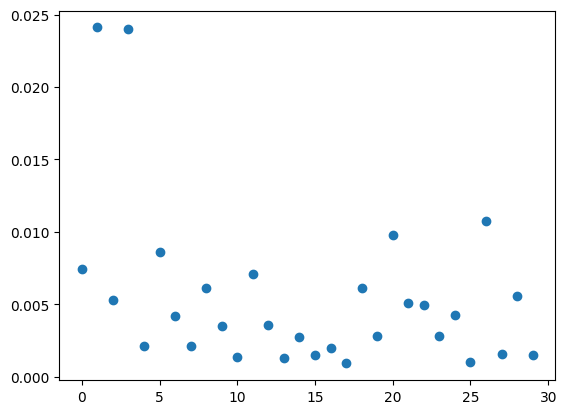

In [7]:
import matplotlib.pyplot as plt

#trying to plot each direction
indices = list(range(1, len(listMediansNF1), 8))
direction1medians = []
for i in range(len(indices)):
    direction1medians.append(listMediansNF1[indices[i]])
plt.figure()
plt.scatter(range(len(direction1medians)), direction1medians)


In [ ]:
from scipy.optimize import curve_fit

def monoExp(x, m, t, b):
    return m * np.exp(-t * x) + b

0.013497706733203827
0.021973599384407103
0.0033715151133762817


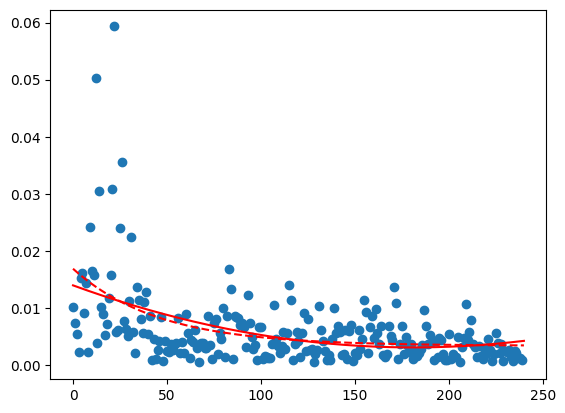

In [15]:
plt.figure()
plt.scatter(range(len(listMediansNF1)), listMediansNF1)
#model1 = np.poly1d(np.polyfit(range(len(listMedians)), listMedians, 1))
model2 = np.poly1d(np.polyfit(range(len(listMediansNF1)), listMediansNF1, 2))
#model3 = np.poly1d(np.polyfit(range(len(listMedians)), listMedians, 3))
#model4 = np.poly1d(np.polyfit(range(len(listMedians)), listMedians, 4))
polyline = np.linspace(0, len(listMediansNF1), len(listMediansNF1))
#plt.plot(polyline, model1(polyline), color='green')
plt.plot(polyline, model2(polyline), color='red')
#plt.plot(polyline, model3(polyline), color='orange')
#plt.plot(polyline, model4(polyline), color='yellow')

# https://rowannicholls.github.io/python/curve_fitting/exponential.html#method-2-curve_fit
# https://stackoverflow.com/questions/3938042/fitting-exponential-decay-with-no-initial-guessing 

opt_params, param_cov = curve_fit(monoExp, polyline, listMediansNF1)
A, K, C = opt_params
fit_y = monoExp(polyline, A, K, C)
plt.plot(polyline, fit_y, "--", color="red")


Text(0.5, 0, 'CF2')

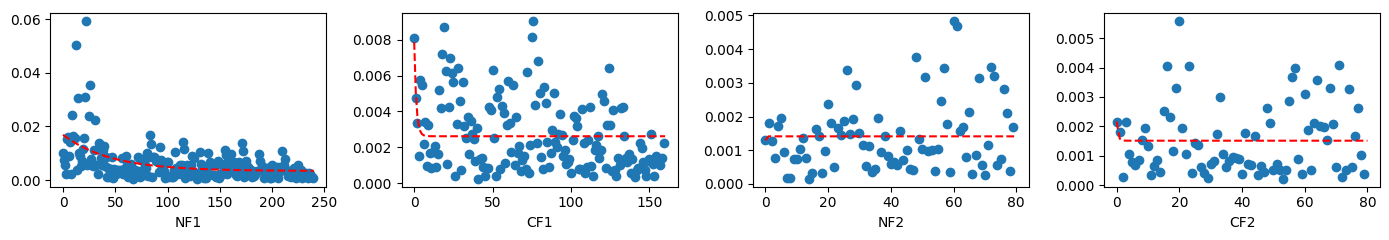

In [19]:
# PLOTTING MEDIANS
plt.figure(figsize=(14, 2.5)).set_tight_layout(True)

plt.subplot(141)
plt.scatter(range(len(listMediansNF1)), listMediansNF1)
model2 = np.poly1d(np.polyfit(range(len(listMediansNF1)), listMediansNF1, 2))
polyline = np.linspace(0, len(listMediansNF1), len(listMediansNF1))
# plt.plot(polyline, model2(polyline), color='red')
opt_params, param_cov = curve_fit(monoExp, polyline, listMediansNF1)
A, K, C = opt_params
fit_y = monoExp(polyline, A, K, C)
plt.plot(polyline, fit_y, "--", color="red")
plt.xlabel('NF1')

plt.subplot(142)
plt.scatter(range(len(listMediansCF1)), listMediansCF1)
model2 = np.poly1d(np.polyfit(range(len(listMediansCF1)), listMediansCF1, 2))
polyline = np.linspace(0, len(listMediansCF1), len(listMediansCF1))
#plt.plot(polyline, model2(polyline), color='red')
opt_params, param_cov = curve_fit(monoExp, polyline, listMediansCF1)
A, K, C = opt_params
fit_y = monoExp(polyline, A, K, C)
plt.plot(polyline, fit_y, "--", color="red")
plt.xlabel('CF1')

plt.subplot(143)
plt.scatter(range(len(listMediansNF2)), listMediansNF2)
model2 = np.poly1d(np.polyfit(range(len(listMediansNF2)), listMediansNF2, 2))
polyline = np.linspace(0, len(listMediansNF2), len(listMediansNF2))
#plt.plot(polyline, model2(polyline), color='red')
opt_params, param_cov = curve_fit(monoExp, polyline, listMediansNF2)
A, K, C = opt_params
fit_y = monoExp(polyline, A, K, C)
plt.plot(polyline, fit_y, "--", color="red")
plt.xlabel('NF2')

plt.subplot(144)
plt.scatter(range(len(listMediansCF2)), listMediansCF2)
model2 = np.poly1d(np.polyfit(range(len(listMediansCF2)), listMediansCF2, 2))
polyline = np.linspace(0, len(listMediansCF2), len(listMediansCF2))
#plt.plot(polyline, model2(polyline), color='red')
opt_params, param_cov = curve_fit(monoExp, polyline, listMediansCF2)
A, K, C = opt_params
fit_y = monoExp(polyline, A, K, C)
plt.plot(polyline, fit_y, "--", color="red")
plt.xlabel('CF2')

Text(0.5, 0, 'CF2')

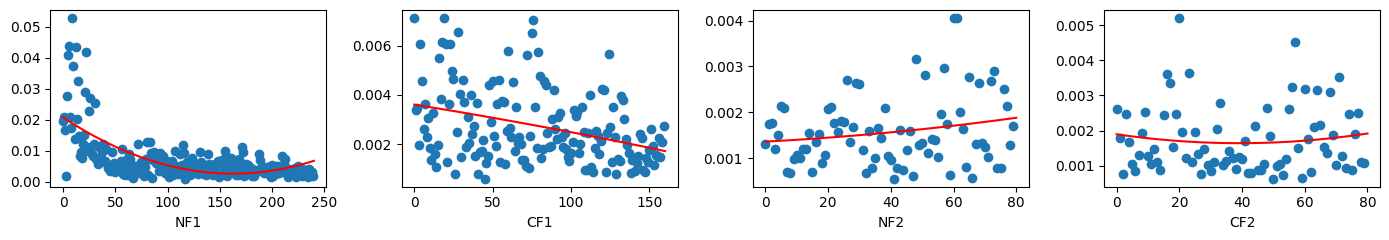

In [48]:
# PLOTTING MEANS
plt.figure(figsize=(14, 2.5)).set_tight_layout(True)

plt.subplot(141)
plt.scatter(range(len(listMeansNF1)), listMeansNF1)
model2 = np.poly1d(np.polyfit(range(len(listMeansNF1)), listMeansNF1, 2))
polyline = np.linspace(0, len(listMeansNF1), 50)
plt.plot(polyline, model2(polyline), color='red')
plt.xlabel('NF1')

plt.subplot(142)
plt.scatter(range(len(listMeansCF1)), listMeansCF1)
model2 = np.poly1d(np.polyfit(range(len(listMeansCF1)), listMeansCF1, 2))
polyline = np.linspace(0, len(listMeansCF1), 50)
plt.plot(polyline, model2(polyline), color='red')
plt.xlabel('CF1')

plt.subplot(143)
plt.scatter(range(len(listMeansNF2)), listMeansNF2)
model2 = np.poly1d(np.polyfit(range(len(listMeansNF2)), listMeansNF2, 2))
polyline = np.linspace(0, len(listMeansNF2), 50)
plt.plot(polyline, model2(polyline), color='red')
plt.xlabel('NF2')

plt.subplot(144)
plt.scatter(range(len(listMeansCF2)), listMeansCF2)
model2 = np.poly1d(np.polyfit(range(len(listMeansCF2)), listMeansCF2, 2))
polyline = np.linspace(0, len(listMeansCF2), 50)
plt.plot(polyline, model2(polyline), color='red')
plt.xlabel('CF2')

Text(0.5, 0, 'CF2')

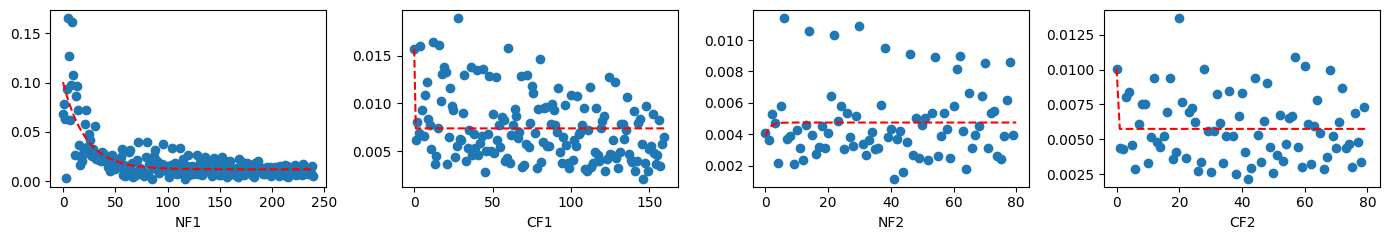

In [20]:
# PLOTTING MAX
plt.figure(figsize=(14, 2.5)).set_tight_layout(True)

plt.subplot(141)
plt.scatter(range(len(listMaxNF1)), listMaxNF1)
model2 = np.poly1d(np.polyfit(range(len(listMaxNF1)), listMaxNF1, 2))
polyline = np.linspace(0, len(listMaxNF1), len(listMaxNF1))
#plt.plot(polyline, model2(polyline), color='red')
opt_params, param_cov = curve_fit(monoExp, polyline, listMaxNF1)
A, K, C = opt_params
fit_y = monoExp(polyline, A, K, C)
plt.plot(polyline, fit_y, "--", color="red")
plt.xlabel('NF1')

plt.subplot(142)
plt.scatter(range(len(listMaxCF1)), listMaxCF1)
model2 = np.poly1d(np.polyfit(range(len(listMaxCF1)), listMaxCF1, 2))
polyline = np.linspace(0, len(listMaxCF1), len(listMaxCF1))
#plt.plot(polyline, model2(polyline), color='red')
opt_params, param_cov = curve_fit(monoExp, polyline, listMaxCF1)
A, K, C = opt_params
fit_y = monoExp(polyline, A, K, C)
plt.plot(polyline, fit_y, "--", color="red")
plt.xlabel('CF1')

plt.subplot(143)
plt.scatter(range(len(listMaxNF2)), listMaxNF2)
model2 = np.poly1d(np.polyfit(range(len(listMaxNF2)), listMaxNF2, 2))
polyline = np.linspace(0, len(listMaxNF2), len(listMaxNF2))
#plt.plot(polyline, model2(polyline), color='red')
opt_params, param_cov = curve_fit(monoExp, polyline, listMaxNF2)
A, K, C = opt_params
fit_y = monoExp(polyline, A, K, C)
plt.plot(polyline, fit_y, "--", color="red")
plt.xlabel('NF2')

plt.subplot(144)
plt.scatter(range(len(listMaxCF2)), listMaxCF2)
model2 = np.poly1d(np.polyfit(range(len(listMaxCF2)), listMaxCF2, 2))
polyline = np.linspace(0, len(listMaxCF2), len(listMaxCF2))
#plt.plot(polyline, model2(polyline), color='red')
opt_params, param_cov = curve_fit(monoExp, polyline, listMaxCF2)
A, K, C = opt_params
fit_y = monoExp(polyline, A, K, C)
plt.plot(polyline, fit_y, "--", color="red")
plt.xlabel('CF2')

## Visualizing the Reaches

In [36]:
import matplotlib.pyplot as plt
target_xy = targetsCF2 ####
xy = resultsCF2 ####
target_x = target_xy[:, -1, 0]
target_y = target_xy[:, -1, 1]
nmov,ntime,_ = np.shape(xy)
#print(range(nmov))



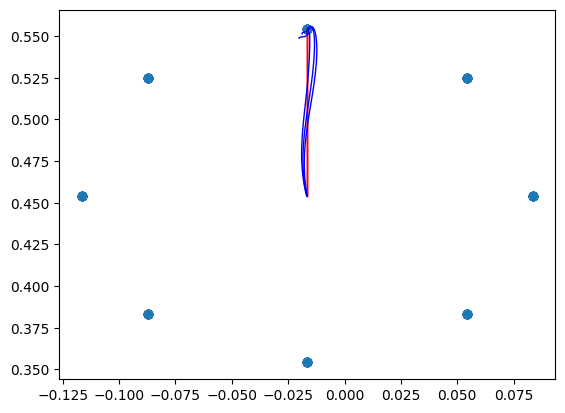

In [37]:
numPerSection = int(nmov/4)

direction = 2 ####

#1
plt.figure()
for i in range(direction, numPerSection, 8):
    plt.plot(target_xy[i,:,0],target_xy[i,:,1],color="r",linewidth=1.0)

#range(4, len(listMedians), 8)
for i in range(direction, numPerSection, 8):
    plt.plot(xy[i,:,0],xy[i,:,1],color="b",linewidth=1.0)
plt.scatter(target_x, target_y)

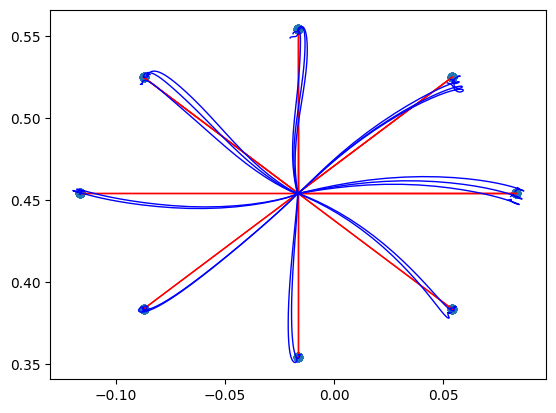

In [24]:
numPerSection = int(nmov/4)

#1
plt.figure()
for i in range(numPerSection):
    plt.plot(target_xy[i,:,0],target_xy[i,:,1],color="r",linewidth=1.0)

#range(4, len(listMedians), 8)
for i in range(numPerSection):
    plt.plot(xy[i,:,0],xy[i,:,1],color="b",linewidth=1.0)
plt.scatter(target_x, target_y)

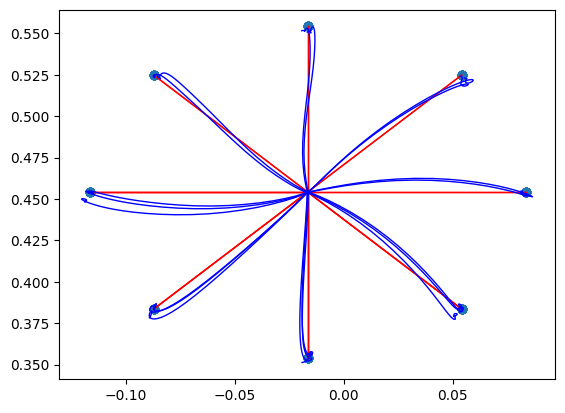

In [25]:
#2
plt.figure()
for i in range(numPerSection):
    plt.plot(target_xy[i+numPerSection,:,0],target_xy[i+numPerSection,:,1],color="r",linewidth=1.0)

for i in range(numPerSection):
    plt.plot(xy[i+numPerSection,:,0],xy[i+numPerSection,:,1],color="b",linewidth=1.0)
plt.scatter(target_x, target_y)

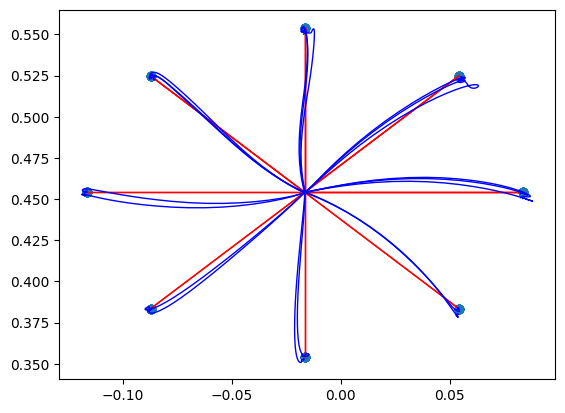

In [26]:
#3
plt.figure()
for i in range(numPerSection):
    plt.plot(target_xy[i+2*numPerSection,:,0],target_xy[i+2*numPerSection,:,1],color="r",linewidth=1.0)

for i in range(numPerSection):
    plt.plot(xy[i+2*numPerSection,:,0],xy[i+2*numPerSection,:,1],color="b",linewidth=1.0)
plt.scatter(target_x, target_y)

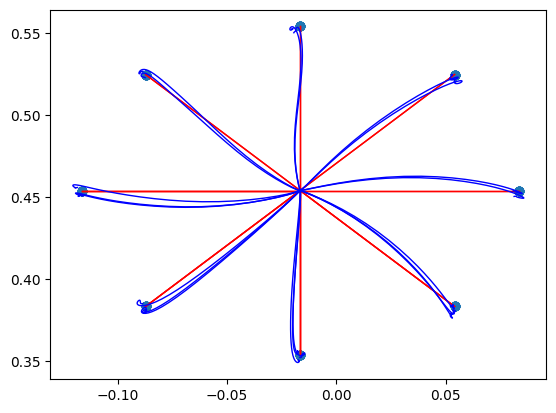

In [27]:
#4
plt.figure()
for i in range(numPerSection):
    plt.plot(target_xy[i+3*numPerSection,:,0],target_xy[i+3*numPerSection,:,1],color="r",linewidth=1.0)

for i in range(numPerSection):
    plt.plot(xy[i+3*numPerSection,:,0],xy[i+3*numPerSection,:,1],color="b",linewidth=1.0)
plt.scatter(target_x, target_y)

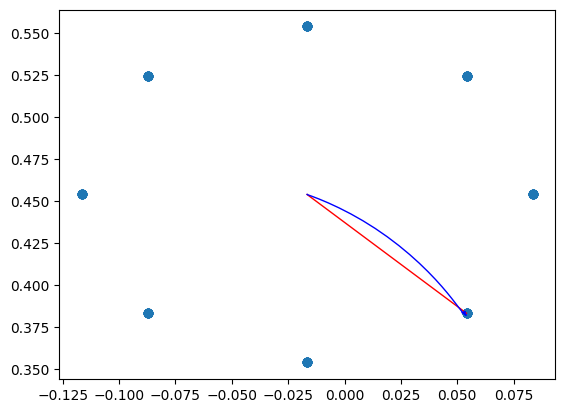

In [28]:
#final
plt.figure()
plt.plot(target_xy[-1,:,0],target_xy[-1,:,1],color="r",linewidth=1.0)

plt.plot(xy[-1,:,0],xy[-1,:,1],color="b",linewidth=1.0)
plt.scatter(target_x, target_y)